## Stock data

In this notebook, we will look at REAL data from Yahoo Finance and make use of the yahoo_fin package.

In particular, we will look at our shosen stock and get a feel for how it fluctuates on a day-to-day basis. We will finally put a number on this by calculating the standard deviation of the relative changes in the stock prices.


In [28]:
#http://theautomatic.net/2019/04/17/how-to-get-options-data-with-python/
#https://algotrading101.com/learn/yahoo-finance-api-guide/
#http://www.quantsbin.com/introduction-stock-analysis-pandas1/
import yahoo_fin.stock_info as si
import pandas as pd
from yahoo_fin.stock_info import get_data
import numpy as np

In [29]:
ticker="nflx"

import datetime
today = datetime.date.today()
#maturity = datetime.date(2020, 10, 23)    # Y M D
maturity = datetime.date(2021, 3, 19)    # Y M D
startdate=datetime.date(2019, 9, 1)    # Y M D
 
stock= get_data(ticker, start_date=startdate, end_date=today, index_as_date = True, interval="1d")
stock

,open,high,low,close,adjclose,volume,ticker
2019-09-03,290.820007,293.899994,288.059998,289.290009,289.290009,3682800,NFLX
2019-09-04,291.250000,292.380005,286.510010,291.519989,291.519989,4652500,NFLX
2019-09-05,285.320007,293.970001,282.790009,293.250000,293.250000,8966800,NFLX
2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600,NFLX
2019-09-09,294.809998,301.549988,290.600006,294.339996,294.339996,8232700,NFLX
...,...,...,...,...,...,...,...
2020-09-14,480.619995,488.989990,471.299988,476.260010,476.260010,7359100,NFLX
2020-09-15,484.000000,497.470001,481.630005,495.989990,495.989990,5337000,NFLX
2020-09-16,499.989990,504.660004,483.309998,483.859985,483.859985,4394900,NFLX
2020-09-17,475.160004,478.399994,463.269989,470.200012,470.200012,5379300,NFLX


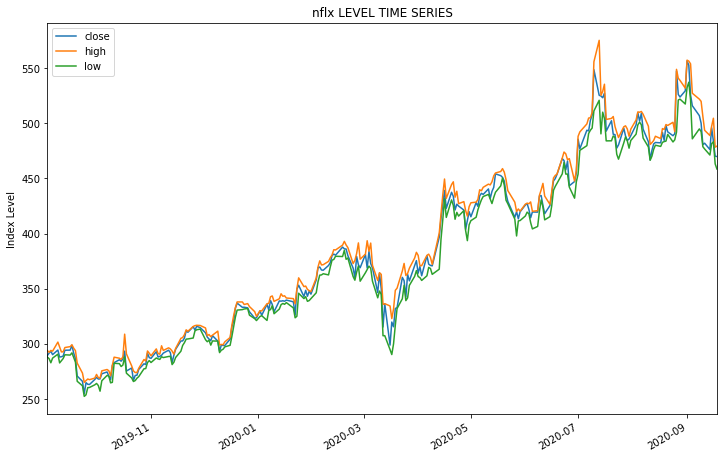

In [30]:
#Plot the data
import matplotlib.pyplot as plt #Matplotlib for pythons basic plotting
import seaborn as sns #Seaborn for heatmap plotting
import scipy.stats as stats #Scipy Stats module for access to statistical formula.
import plotly
plt.rcParams['figure.figsize'] = [12, 8]
_ = stock[['close','high','low']].plot()
plt.ylabel('Index Level')
plt.title (ticker +' LEVEL TIME SERIES')
plt.legend()
plt.show()

Avg daily return is 0.221829%


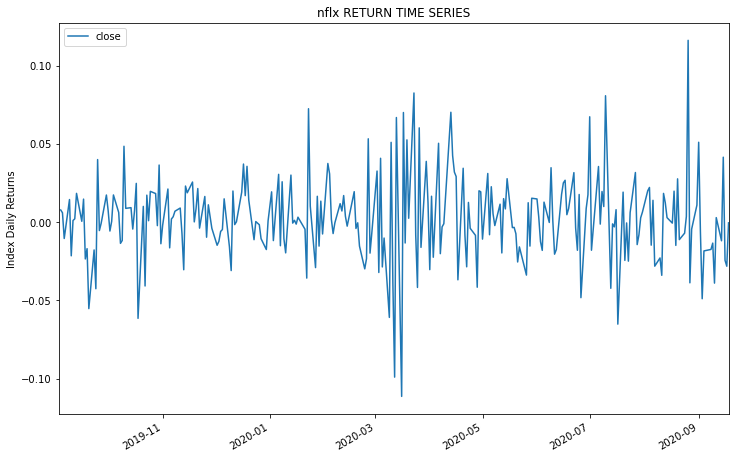

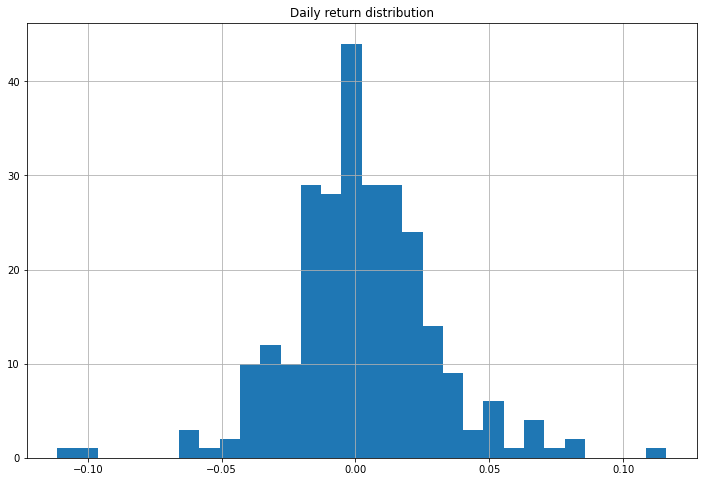

In [31]:
#Plot returns distribution
daily_returns = stock['close'].pct_change()
print("Avg daily return is {:.6f}%".format(daily_returns.mean()*100))
_ = daily_returns.plot()
plt.ylabel('Index Daily Returns')
plt.title (ticker +' RETURN TIME SERIES')
plt.legend()
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()
_1 = daily_returns.hist(bins=30)
plt.title('Daily return distribution')
plt.show()

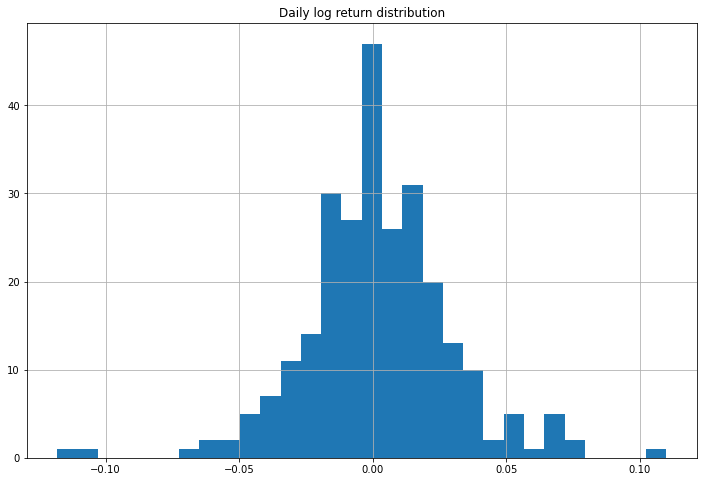

In [32]:
#Daily log returns
daily_log_returns = np.log(daily_returns+1)
_1 = daily_log_returns.hist(bins=30)
plt.title('Daily log return distribution')
plt.show()

In [33]:
# Calculate the annualized volatility

volatility = daily_log_returns.std() * (252**0.5)
print("Annualized daily volatility from {} to {} for {} is {:.2f}%".format\
      (stock.index[0].date(), stock.index[-1].date(), ticker, volatility*100))



Annualized daily volatility from 2019-09-03 to 2020-09-18 for nflx is 43.74%


In [35]:
pricetoday=si.get_live_price(ticker)
print("The current price of the stock is ",pricetoday)

The current price of the stock is  469.9599914550781
